In [ ]:
#-------------------------------------the latest（均值为0删除不预测，因为一个学生还有其他班级要考试）--------------------------------------------

In [17]:
import pandas as pd  
from sklearn.linear_model import LinearRegression  
import numpy as np
from sklearn.metrics import mean_squared_error  
  
# 读取数据到DataFrame a  
df = pd.read_csv('merged_table_with_labels (2).csv')  # 替换为你的数据文件路径  


# 识别无效值和特定值   
#invalid_stddev2 = df['stddev_col1']==0  # 识别无效值（例如None）
#zero_mean = df['mean_col1'] == 0  # 识别'mean_col1'中的0值  
#计算用于替代的中位数
#medians = df.filter(like='stddev_col1').apply(pd.Series.median)

  
 # 删除包含无效值或特定值的行  ，完成替代
median_value = df['stddev_col1'].median()  
  
# 将'stddev_col'列中的所有0值和无效值替换为中位数  
df['stddev_col1'] = df['stddev_col1'].replace([0, np.nan], median_value)  
df_clean = df[ ~zero_mean]  # 使用逻辑AND操作符确保同时满足两个条件  
#df_clean.to_csv('test_2.csv')
df_clean.head(500)





,personid,clazzid,mean_col1,stddev_col1,max_col2,min_score,count,total_exam_number,exam_attending_rate,activity_count_a,activity_count_b,activity_rate,cluster_label,future_score
0,28418748,8009011,105.000000,2.329829,105.0,105.0,1,1,1.000000,160,228,0.701754,2,0
1,28418748,9665081,90.000000,7.071068,100.0,80.0,5,9,0.555556,160,228,0.701754,2,0
2,28418748,6138412,61.000000,2.329829,61.0,61.0,1,1,1.000000,160,228,0.701754,1,0
3,28418748,5375163,60.500000,55.861436,100.0,21.0,2,2,1.000000,160,228,0.701754,2,0
4,28418748,8010701,58.333333,48.562674,100.0,5.0,3,3,1.000000,160,228,0.701754,1,0
7,28418559,8009011,101.500000,2.329829,101.5,101.5,1,1,1.000000,175,246,0.711382,2,0
8,28418559,9665081,92.000000,6.708204,100.0,85.0,5,9,0.555556,175,246,0.711382,2,0
9,28418559,6319316,78.000000,18.384776,91.0,65.0,2,2,1.000000,175,246,0.711382,2,0
10,28418559,8010701,59.666667,48.273526,90.0,4.0,3,3,1.000000,175,246,0.711382,1,0
11,28418559,6138425,32.000000,2.329829,32.0,32.0,1,2,0.500000,175,246,0.711382,1,0


In [18]:
# 确保必要的列存在  
necessary_columns = ['personid', 'mean_col1', 'stddev_col1', 'exam_attending_rate', 'activity_rate']  
if not set(necessary_columns).issubset(df_clean.columns):  
    raise ValueError("One or more necessary columns are missing from the DataFrame.")  
  
 # 创建新的DataFrame b来存储预测结果  
df_b = pd.DataFrame(columns=['personid', 'future_score'])  
  

grouped = df_clean.groupby('personid')  
for personid, group in grouped:  
    X = group[['mean_col1', 'stddev_col1', 'exam_attending_rate', 'activity_rate']]  
    y = group['mean_col1']  

    # 拟合线性回归模型  
    model = LinearRegression()  
    model.fit(X, y)  
  
    # 预测  
    y_pred = model.predict(X)  
  
    # 将预测结果存入新DataFrame b中，针对当前personid的数据行进行赋值  
    df_b = pd.concat([df_b, pd.DataFrame({'personid': personid, 'future_score': y_pred[0]}, index=[0])], ignore_index=True)  
  
 # 将DataFrame b保存到文件或打印出来  
df_b.to_csv('predition_score3.csv')


In [27]:
#查看整体学情信息
import pandas as pd  
import matplotlib.pyplot as plt  
  

# 计算每个分数段的人数  
df_b['score_group'] = pd.cut(df_b['future_score'], bins=[-float('inf'), 60, 85, float('inf')], labels=[1, 2, 3])  
#print(df_b.columns)


Index(['personid', 'future_score', 'score_group'], dtype='object')


In [31]:
# 计算总的future_score数量  
total_count = len(df_b)  
  
# 使用pd.cut()函数将数据分为三个部分  
df_b['score_group'] = pd.cut(df_b['future_score'], bins=[-float('inf'), 60, 85, float('inf')], labels=['<60', '60-85', '>85'])  
  
# 计算每个部分的数量  
group_counts = df_b['score_group'].value_counts()  
print(group_counts)
  
# 计算每个部分所占的比例  
group_percentages = (group_counts / total_count) * 100 
print(group_percentages)


  


<60      3496
60-85    2176
>85      1525
Name: score_group, dtype: int64
<60      48.575795
60-85    30.234820
>85      21.189384
Name: score_group, dtype: float64


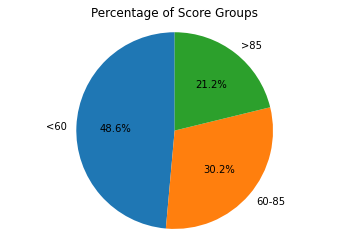

In [32]:
fig, ax = plt.subplots()  
ax.pie(group_percentages, labels=group_percentages.index, autopct='%1.1f%%', startangle=90)  
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.  
plt.title("Percentage of Score Groups")  
plt.show()

In [1]:
import matplotlib.pyplot as plt  
import pandas as pd  
  

df_a = pd.read_csv('predition_score1.csv')  # 读取数据到DataFrame  
  
# 可视化DataFrame  
plt.scatter(df_a['personid'], df_a['future_score'], c='b', alpha=0.5)  # 使用蓝色显示正常值  
plt.scatter(df_a[df_a['future_score'] ==0]['personid'], df_a[df_a['future_score'] ==0]['future_score'], c='r', alpha=0.5)  # 使用红色突出显示异常值（0）  
plt.scatter(df_a[df_a['future_score'] <60]['personid'], df_a[df_a['future_score'] <60]['future_score'], c='g', alpha=0.5)

plt.xlabel('Person ID')  
plt.ylabel('Future Score')  
plt.title('Future Score Distribution')  
plt.show()


KeyboardInterrupt

